In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
authors = pd.read_pickle("../../data/interim/european_authors_with_all_taxonomic_articles.pkl")
# get unique authors per journal
authors = authors.drop_duplicates(subset=["author_id", "source_id"])

In [8]:
# start with journal that has most authors
first_journal = max(authors["source_id"],key=list(authors["source_id"]).count)
journal_path = [first_journal,]

authors_seen = list(authors[authors["source_id"]==first_journal]["author_id"])
nr_authors_path = [len(authors_seen),]

unexplored = list(set(authors["source_id"]))
unexplored.remove(first_journal)

In [6]:
# dictionary with journal name and author ids in that journal
journal_authors = {}
for journal in set(authors["source_id"]):
    journal_authors[journal] = list(authors[authors["source_id"]==journal]["author_id"])

In [7]:
# find out how many of the authors in a proposed journal have already been seen
def not_in_common(authors1, journal2):
    authors2 = journal_authors[journal2]
    # get number of authors in journal2 not in total author list so far
    n = 0
    for author in authors2:
        if author not in authors1:
            n += 1
    return n

In [11]:
# find path of least resistance through journals
while unexplored != None:
    best_journal = ""
    best_author_nr = 0

    # go over every unexplored journal to find out if they're the best
    for j in unexplored:
        new_blood = not_in_common(authors_seen, j)
        # save best journal
        if new_blood > best_author_nr:
            best_author_nr = new_blood
            best_journal = j
    
    if best_author_nr == 0:
        break
        
    # add to path
    authors_seen.extend(journal_authors[best_journal])
    journal_path.append(best_journal)
    nr_authors_path.append(best_author_nr)
    print("Next best: "+journal_path[-1])
    
    unexplored.remove(best_journal)

Next best: https://openalex.org/S171471881
Next best: https://openalex.org/S1983995261
Next best: https://openalex.org/S58631098
Next best: https://openalex.org/S100787194
Next best: https://openalex.org/S158228368
Next best: https://openalex.org/S137773608
Next best: https://openalex.org/S96989847
Next best: https://openalex.org/S125754415
Next best: https://openalex.org/S3006207977
Next best: https://openalex.org/S57552105
Next best: https://openalex.org/S2254258
Next best: https://openalex.org/S64097828
Next best: https://openalex.org/S154343897
Next best: https://openalex.org/S19032547
Next best: https://openalex.org/S166799026
Next best: https://openalex.org/S126748203
Next best: https://openalex.org/S151808461
Next best: https://openalex.org/S162100826
Next best: https://openalex.org/S48852984
Next best: https://openalex.org/S159699259
Next best: https://openalex.org/S155128447
Next best: https://openalex.org/S26519103
Next best: https://openalex.org/S196656238
Next best: https:/

Next best: https://openalex.org/S196708879
Next best: https://openalex.org/S190575794
Next best: https://openalex.org/S4210168639
Next best: https://openalex.org/S4210212754
Next best: https://openalex.org/S25861425
Next best: https://openalex.org/S4210176717
Next best: https://openalex.org/S2736449006
Next best: https://openalex.org/S4210230814
Next best: https://openalex.org/S33840881
Next best: https://openalex.org/S4210236017
Next best: https://openalex.org/S4210171642
Next best: https://openalex.org/S174470695
Next best: https://openalex.org/S79992667
Next best: https://openalex.org/S4210201479
Next best: https://openalex.org/S185825760
Next best: https://openalex.org/S88168125
Next best: https://openalex.org/S137870640
Next best: https://openalex.org/S136898295
Next best: https://openalex.org/S48434751
Next best: https://openalex.org/S7429653
Next best: https://openalex.org/S4210232130
Next best: https://openalex.org/S166785169
Next best: https://openalex.org/S4210219480
Next bes

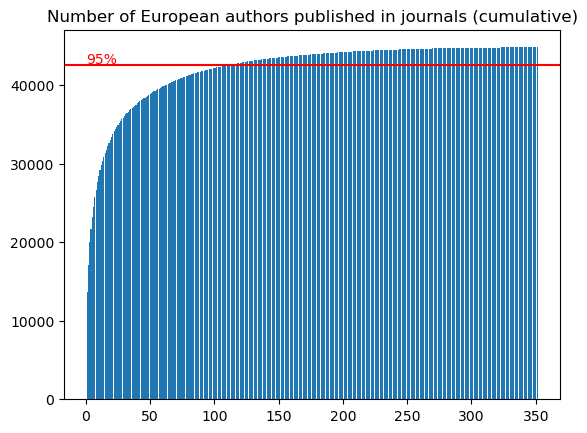

In [14]:
# plot path through journals with most new authors, cumulatively
fig, ax = plt.subplots()
cumulative_path = np.cumsum(nr_authors_path)

plt.bar(x=range(1,len(journal_path)+1), height=cumulative_path)
#plt.xticks(rotation=90, ha="center", fontsize=4)
ax.set_title("Number of European authors published in journals (cumulative)")

# add 95% line
value_95 = cumulative_path[-1]*0.95
plt.axhline(y=value_95, color="red", label="95%")
ax.text(0.5, value_95+200,"95%", color="red")
# plt.show()
plt.savefig("../../reports/figures/cumulative_graph_european_authors_in_journals_test.png")

In [38]:
journal_id_names = authors[["source_display_name", "source_id"]].drop_duplicates()
journal_id_names = journal_id_names.set_index("source_id")

with open("../../data/interim/journals_cumulative_path_test.txt", "w", encoding="utf-8") as f:
    for journal_id in journal_path:
        # write each item on a new line
        journal_name = journal_id_names.loc[journal_id]
        f.write(journal_name[0]+"\n")
    # add last journals too
    for journal_id in unexplored:
        journal_name = journal_id_names.loc[journal_id]
        f.write(journal_name[0]+" (added no authors)\n")